# **Mask and Social distancing Detection**

**Social distancing**, also called “**physical distancing**,” means keeping a safe space between yourself and other people who are not from your household.  
To practice social or physical distancing, stay at least 6 feet (about 2 arm lengths) from other people who are not from your household in both indoor and outdoor spaces.

## **Objective**

The objective is to build a Deep Learning model which can identify if the person is wearing a mask or not, also detecting if or not the people are violating the social distancing norms. This is done using **Haar Cascade** classifiers in OpenCV Python.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss0.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss1.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss10.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss100.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss101.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss102.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss103.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss104.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss105.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss106.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annotations\maksssksksss107.xml
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\annot

D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\5307.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\5311.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\5312.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\5313.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\5339.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\542.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\543.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\5448.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\5449.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Test\WithoutMask\5461.png
D:/DevIncept/Intern-Wo

D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_354_4011247.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_354_5388559.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_354_8523008.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_354_983611.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_355_431193.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_355_5681810.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_355_6978309.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_355_8323278.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_3

D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_662_1832234.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_662_3965801.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_662_4257662.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_662_4957817.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_662_9460967.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_663_2065164.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_663_2136006.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented_663_4075901.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithMask\Augmented

D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1433.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1434.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1435.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1436.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1437.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1440.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1441.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1442.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1444.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\1445.png
D:/DevInce

D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\3285.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\3286.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\3287.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\3288.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\3289.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\329.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\3290.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\3291.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\3292.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\3293.png
D:/DevIncep

D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\5484.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\5485.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\5486.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\5487.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\549.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\5490.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\5491.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\5492.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\5493.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Train\WithoutMask\5494.png
D:/DevIncep

D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Validation\WithoutMask\5880.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Validation\WithoutMask\5884.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Validation\WithoutMask\5890.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Validation\WithoutMask\5894.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Validation\WithoutMask\5923.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Validation\WithoutMask\5927.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Validation\WithoutMask\5933.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Validation\WithoutMask\5937.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask Dataset\Validation\WithoutMask\596.png
D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection\Face Mask D

In [2]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection/Haarcascades/haarcascade_frontalface_default.xml')

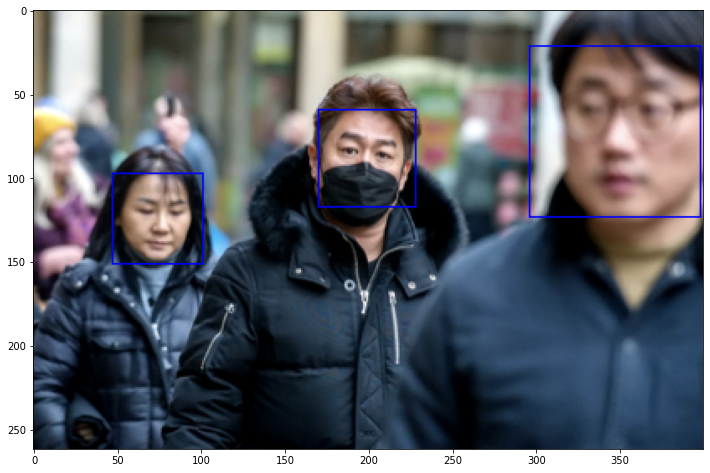

In [3]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection/images/maksssksksss244.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

### **Detecting social distancing violations**

This can be done by iterating over the coordinates of faces and calculating the distance for each possible pair, if the distance for a particular pair is less than MIN_DISTANCE then the bounding boxes for those faces are colored red. MIN_DISTANCE must be manually initialized in such a way that it corresponds to the minimum allowable distance in real life (ex. 6ft in India).

In [4]:
MIN_DISTANCE = 130

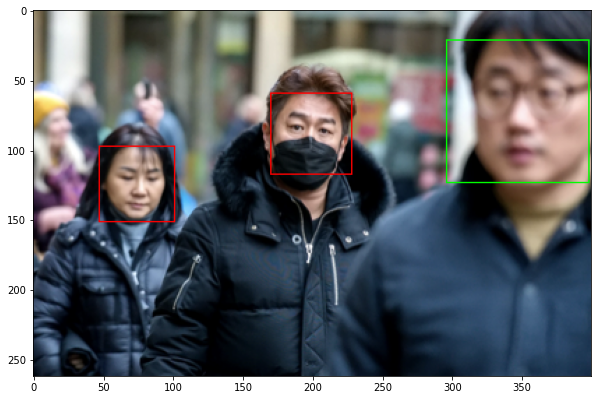

In [5]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

Red box shows violation of social distancing.

### **Using VGG19 for mask detection**

In [6]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = 'D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection/Face Mask Dataset/Train'
test_dir = 'D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection/Face Mask Dataset/Test'
val_dir = 'D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection/Face Mask Dataset/Validation'

In [8]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### **Building VGG19 transfer learning model**

In [9]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

80150528/80134624 [==============================] - 7s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 16386     
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [10]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [11]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
9/9 [==============================] - 28s 2s/step - loss: 0.5067 - accuracy: 0.7464
Epoch 2/20
9/9 [==============================] - 16s 2s/step - loss: 0.2195 - accuracy: 0.9189
Epoch 3/20
9/9 [==============================] - 17s 2s/step - loss: 0.1677 - accuracy: 0.9335
Epoch 4/20
9/9 [==============================] - 16s 2s/step - loss: 0.0881 - accuracy: 0.9694
Epoch 5/20
9/9 [==============================] - 16s 2s/step - loss: 0.1051 - accuracy: 0.9679
Epoch 6/20
9/9 [==============================] - 16s 2s/step - loss: 0.0848 - accuracy: 0.9730
Epoch 7/20
9/9 [==============================] - 16s 2s/step - loss: 0.0760 - accuracy: 0.9701
Epoch 8/20
9/9 [==============================] - 16s 2s/step - loss: 0.0836 - accuracy: 0.9690
Epoch 9/20
9/9 [==============================] - 16s 2s/step - loss: 0.0660 - accuracy: 0.9867
Epoch 10/20
9/9 [==============================] - 17s 2s/step - loss: 0.0436 - accuracy: 0.9922
Epoch 11/20
9/9 [======================

In [13]:
model.evaluate(test_generator)

25/25 [==============================] - 43s 2s/step - loss: 0.0676 - accuracy: 0.9750


[0.0675848126411438, 0.9750000238418579]

**Our model achieved 97.5% accuracy on test data.**

### **Testing the model on the test data**

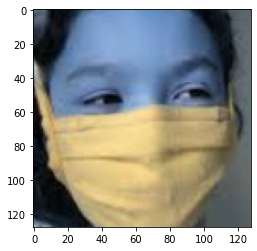

In [14]:
sample_mask_img = cv2.imread('D:/DevIncept/Intern-Work/int-cv-1/Face Mask Detection/Face Mask Dataset/Test/WithMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [15]:
model.predict(sample_mask_img)

array([[0.97808456, 0.0094648 ]], dtype=float32)

### **Save the model**

In [16]:
model.save('masknet.h5')

### **Integrating with Haar Cascade**

In [17]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

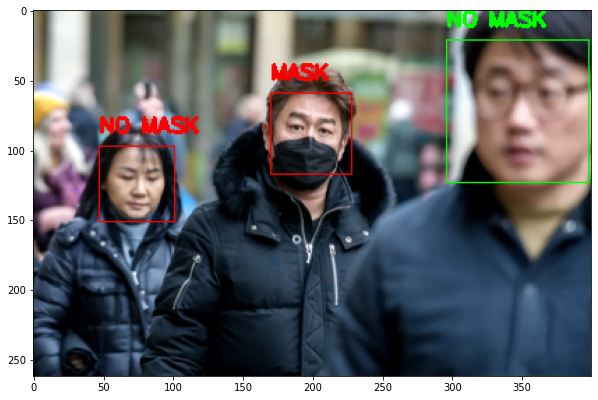

In [18]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")